In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class Retail:
    def __init__(self):
        # creating instance variables...
        self.customer_data = None
        self.orders_data = None
        self.salesman_data = None
    
    def read_data(self):
        # Initialize data sets....
        customer_data = pd.read_csv('C://Users//Shrey//Desktop//Python_Programs//Pandas_Practice//Customer.csv')
        orders_data = pd.read_csv('C://Users//Shrey//Desktop//Python_Programs//Pandas_Practice//Orders.csv')
        salesman_data = pd.read_csv('C://Users//Shrey//Desktop//Python_Programs//Pandas_Practice//Salesman.csv')
        
        self.customer_data = customer_data
        self.orders_data = orders_data
        self.salesman_data = salesman_data
        

In [6]:
retail = Retail()
retail.read_data()

In [10]:
retail.orders_data

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001,150.50,2012-10-05,3005,5002
1,70009,270.65,2012-09-10,3001,5005
2,70002,65.26,2012-10-05,3002,5001
3,70004,110.50,2012-08-17,3009,5003
4,70007,948.50,2012-09-10,3005,5002
5,70005,2400.60,2012-07-27,3007,5001
6,70008,5760.00,2012-09-10,3002,5001
7,70010,1983.43,2012-10-10,3004,5006
8,70003,2480.40,2012-10-10,3009,5003
9,70012,250.45,2012-06-27,3008,5002


In [14]:
# Find Total Purchase amount on all orders
total_amount = np.sum(np.array(retail.orders_data['purch_amt']))
print("The Total Purchase Amount on all orders is : ")
print(total_amount)

The Total Purchase Amount on all orders is : 
17541.18


In [15]:
# find the average purchase amount of all orders.
print("Average Purchase Amount on all Orders is : ")
print(np.mean(np.array(retail.orders_data['purch_amt'])))

Average Purchase Amount on all Orders is : 
1461.765


In [20]:
# find the number of salesmen currently listing for all of their customers. 
print("Number of Salesmen for all of their customers is : ")
print len(retail.orders_data['salesman_id'].unique())

Number of Salesmen for all of their customers is : 
6


In [21]:
# find the number of customers who gets at least a gradation for his/her performance.
customer_data = retail.customer_data
customer_data

,customer_id,cust_name,city,grade,salesman_id
0,3002,Nick Rimando,New York,100.0,5001
1,3005,Graham Zusi,California,200.0,5002
2,3001,Brad Guzan,London,NaN,5005
3,3004,Fabian Johns,Paris,300.0,5006
4,3007,Brad Davis,New York,200.0,5001
5,3009,Geoff Camero,Berlin,100.0,5003
6,3008,Julian Green,London,300.0,5002
7,3003,Jozy Altidor,Moscow,200.0,5007


In [35]:
print "Number of customers getting atleast a gradation for their performance is : "
print len(customer_data['grade']) - len(customer_data[customer_data['grade'].isnull()])

Number of customers getting atleast a gradation for their performance is : 
7


In [37]:
# get the maximum purchase amount of all the orders.
print("Maximum purchase amount on all orders is : ")
print(np.max(np.array(retail.orders_data['purch_amt'])))

Maximum purchase amount on all orders is : 
5760.0


In [39]:
# selects the highest grade for each of the cities of the customers
print("Highest Grade for each of the cities of the customers is : ")
highest_grade = retail.customer_data.groupby(['city']).agg({'grade' : 'max'})
highest_grade.reset_index()

Highest Grade for each of the cities of the customers is : 


,city,grade
0,Berlin,100.0
1,California,200.0
2,London,300.0
3,Moscow,200.0
4,New York,200.0
5,Paris,300.0


In [43]:
# find the highest purchase amount ordered by the each customer with their ID and highest purchase amount.
print("Highest Purchase Amount ordered by each customer with their ID and highest purchase amount.")
highest_orders = retail.orders_data.groupby(['customer_id']).agg({'purch_amt' : 'max'}).reset_index()
highest_orders.columns = ['Customer Id', 'Purchase Amount']
highest_orders

Highest Purchase Amount ordered by each customer with their ID and highest purchase amount.


,Customer Id,Purchase Amount
0,3001,270.65
1,3002,5760.00
2,3003,75.29
3,3004,1983.43
4,3005,948.50
5,3007,2400.60
6,3008,250.45
7,3009,2480.40


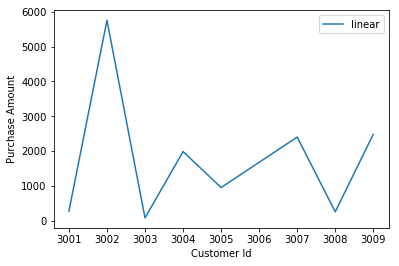

In [52]:
# Plot a Chart on this...
customer_id = np.array(highest_orders['Customer Id'])
purchase_amount = np.array(highest_orders['Purchase Amount'])

plt.plot(customer_id, purchase_amount, label = 'linear')
plt.legend() # Adding a legend...

plt.xlabel('Customer Id')
plt.ylabel('Purchase Amount')
# Show the Plot
plt.show()

In [54]:
# find the highest purchase amount ordered by the each customer on a particular date with their ID, 
# order date and highest purchase amount.
print "Highest Purchase Amount ordered by each customer on a particular date with their ID and order date is : "
retail.orders_data.groupby(['customer_id','ord_date']).agg({'purch_amt' : 'max'}).reset_index()

Highest Purchase Amount ordered by each customer on a particular date with their ID and order date is : 


,customer_id,ord_date,purch_amt
0,3001,2012-09-10,270.65
1,3002,2012-04-25,3045.60
2,3002,2012-09-10,5760.00
3,3002,2012-10-05,65.26
4,3003,2012-08-17,75.29
5,3004,2012-10-10,1983.43
6,3005,2012-09-10,948.50
7,3005,2012-10-05,150.50
8,3007,2012-07-27,2400.60
9,3008,2012-06-27,250.45


In [59]:
#find the highest purchase amount on a date '2012-08-17' for each salesman with their ID.
dated_data = retail.orders_data[retail.orders_data['ord_date'] == '2012-08-17']
dated_data.groupby(['salesman_id']).agg({'purch_amt' : 'max'}).reset_index()

,salesman_id,purch_amt
0,5003,110.50
1,5007,75.29


In [64]:
# find the highest purchase amount with their ID and order date, for only those customers who have highest purchase amount 
# in a day is more than 2000.
filtered_data = retail.orders_data[retail.orders_data['purch_amt'] > 2000]
filtered_data.groupby(['customer_id','ord_date']).agg({'purch_amt' : 'max'}).reset_index()

,customer_id,ord_date,purch_amt
0,3002,2012-04-25,3045.6
1,3002,2012-09-10,5760.0
2,3007,2012-07-27,2400.6
3,3009,2012-10-10,2480.4


In [66]:
'''
find the highest purchase amount with their ID and order date, for those customers who have a higher purchase amount 
in a day is within the range 2000 and 6000.
'''
filtered_data = retail.orders_data[(retail.orders_data['purch_amt']).between(2000,6000)]
filtered_data.groupby(['customer_id','ord_date']).agg({'purch_amt' : 'max'}).reset_index()

,customer_id,ord_date,purch_amt
0,3002,2012-04-25,3045.6
1,3002,2012-09-10,5760.0
2,3007,2012-07-27,2400.6
3,3009,2012-10-10,2480.4


In [79]:
'''
find the highest purchase amount with their ID and order date, for only those customers who have a higher purchase 
amount in a day is within the list 2000, 3000, 5760 and 6000.
'''
filtered_data = filtered_data.groupby(['customer_id','ord_date']).agg({'purch_amt' : 'max'}).reset_index() 
for i in range(0,len(filtered_data)):
    if filtered_data.iloc[i]['purch_amt'] in [2000,3000,6000,5760]:
        print list(filtered_data.iloc[i][['customer_id','ord_date','purch_amt']])

[3002, '2012-09-10', 5760.0]
